In [1]:
from lib import Corpus, Keyboard, Layout, Result, STANDARD_KBD, std_key_shape, STD_EXTRA_KEYS, ERGODOX, compare
import pandas as pd

<AxesSubplot: title={'center': 'ergodox with monogram penalties'}>

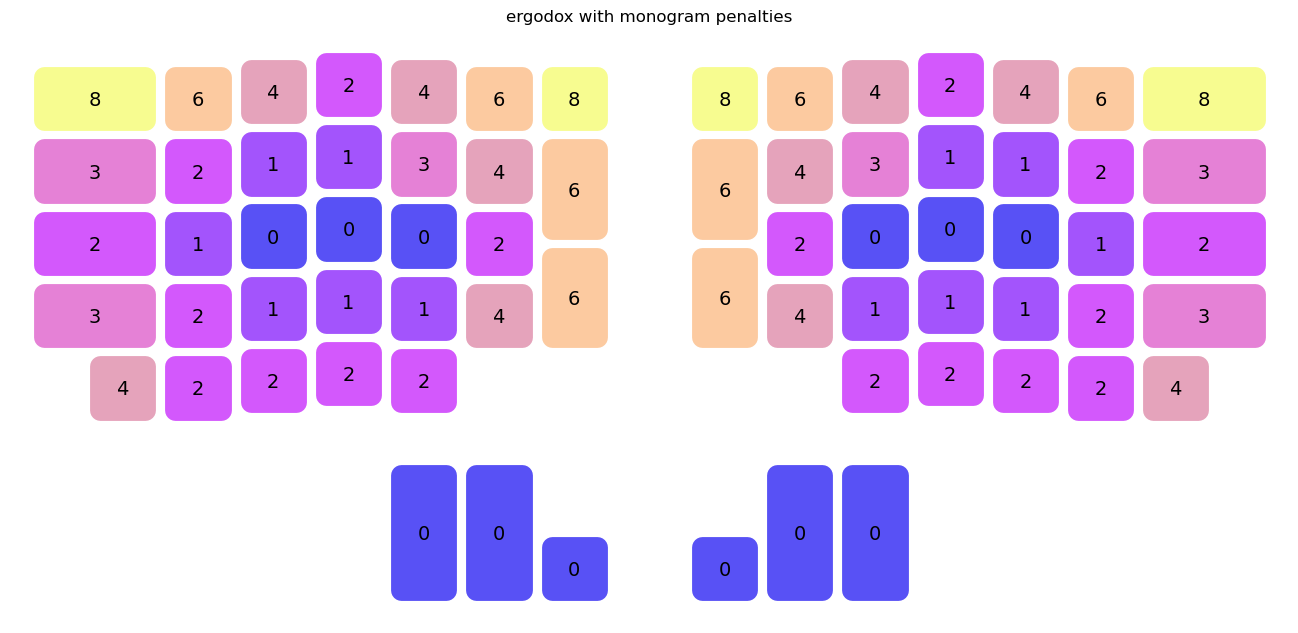

In [2]:
ERGODOX.display()

In [3]:
CORP = Corpus.from_path('../sampletexts.txt', 'sample1.txt', 'sample2.txt')

In [4]:
layouts = {
    'optozorax': # 2021 https://optozorax.github.io/p/my-keyboard-layout/#russkii-iazyk
    # author never mentions parens in his keyboard definition. I just tossed them wherever there was place.
    ('''
    
+;.:=@∅ ∅*!?#/∅
-йцуеф∅ ∅щгтнз∅
"кмвап   ролджэ
'ячсиы∅ ,шьбюхё
∅∅∅∅∅∅∅ ∅∅∅\∅∅∅
    ∅∅¶ .⌴∅

(75319^ №02468)
_∅∅∅∅∅∅ $∅∅∅∅∅∅
&∅∅∅∅∅   ∅∅∅∅∅∅
|∅∅∅∅∅∅ ∅∅ъ∅∅∅∅
∅∅∅∅∅     ∅%∅∅∅
    ∅∅∅ ∅∅∅
''',
ERGODOX),
    
    'ergodox':  # standard Russian on Ergodox (has troubles with right end of the upper row)
(''' 
ё123456 7890\ъ∅
-йцуке∅ ∅нгшщзх
=фывап   ролджэ
∅ячсми∅ ∅тьбю.∅
∅∅∅∅∅     ∅∅∅∅∅
    ⌴→∅ ∅¶∅

∅!"№;%: ?*()/∅∅
_∅∅∅∅∅∅ ∅∅∅∅∅∅∅
+∅∅∅∅∅   ∅∅∅∅∅∅
∅∅∅∅∅∅∅ ∅∅∅∅∅,∅
∅∅∅∅∅     ∅∅∅∅∅
    ∅∅∅ ∅∅∅

''',
ERGODOX),
    
    
'тест38эрго': 
(r''' 
ъ123456 7890-=/
цфэыхё∅ ∅жмвкчш
=аоие,   йртнсз
∅щьуяю∅ ∅глдпб∅
∅∅∅∅∅     ∅∅∅∅∅
    ⌴→∅ ∅¶∅

∅!"№;%: ?*()/∅∅
_∅∅∅∅∅∅ ∅∅∅∅∅∅∅
+∅∅∅∅.   ∅∅∅∅∅∅
∅∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅∅∅∅∅     ∅∅∅∅∅
    ∅∅∅ ∅∅∅

''',
ERGODOX),

}

    

In [5]:
results = {}

for k, definition in layouts.items():
    if isinstance(definition, str):
        definition = (definition, real_kbd)
    lyt = Layout(k, definition)
    print(f'layout {k}: ', end='')
    results[k] = r = Result(CORP, lyt)
    print(round(r.score, 4))

key "." repeated: 2
layout optozorax: 2.1611
layout ergodox: 2.9982
key "/" repeated: 2
key "=" repeated: 2
layout тест38эрго: 1.2308


# Final Standings <a name="standings">

In [6]:
chosen_kbd = [
    ('optozorax', 'ErgoDox Moonlander, alien'),
    ('ergodox', 'Stardand Russian on Ergodox'),
    ('тест38эрго', 'My layout minimally adapted to Ergodox'),
]
print(
    pd.DataFrame([(k, results[k].score.round(3), d) for k, d in chosen_kbd],
        columns=['layout', 'score', 'comment']).sort_values('score', ascending=True)
    .to_markdown(index=False)
)


| layout     |   score | comment                                |
|:-----------|--------:|:---------------------------------------|
| тест38эрго |   1.231 | My layout minimally adapted to Ergodox |
| optozorax  |   2.161 | ErgoDox Moonlander, alien              |
| ergodox    |   2.998 | Stardand Russian on Ergodox            |


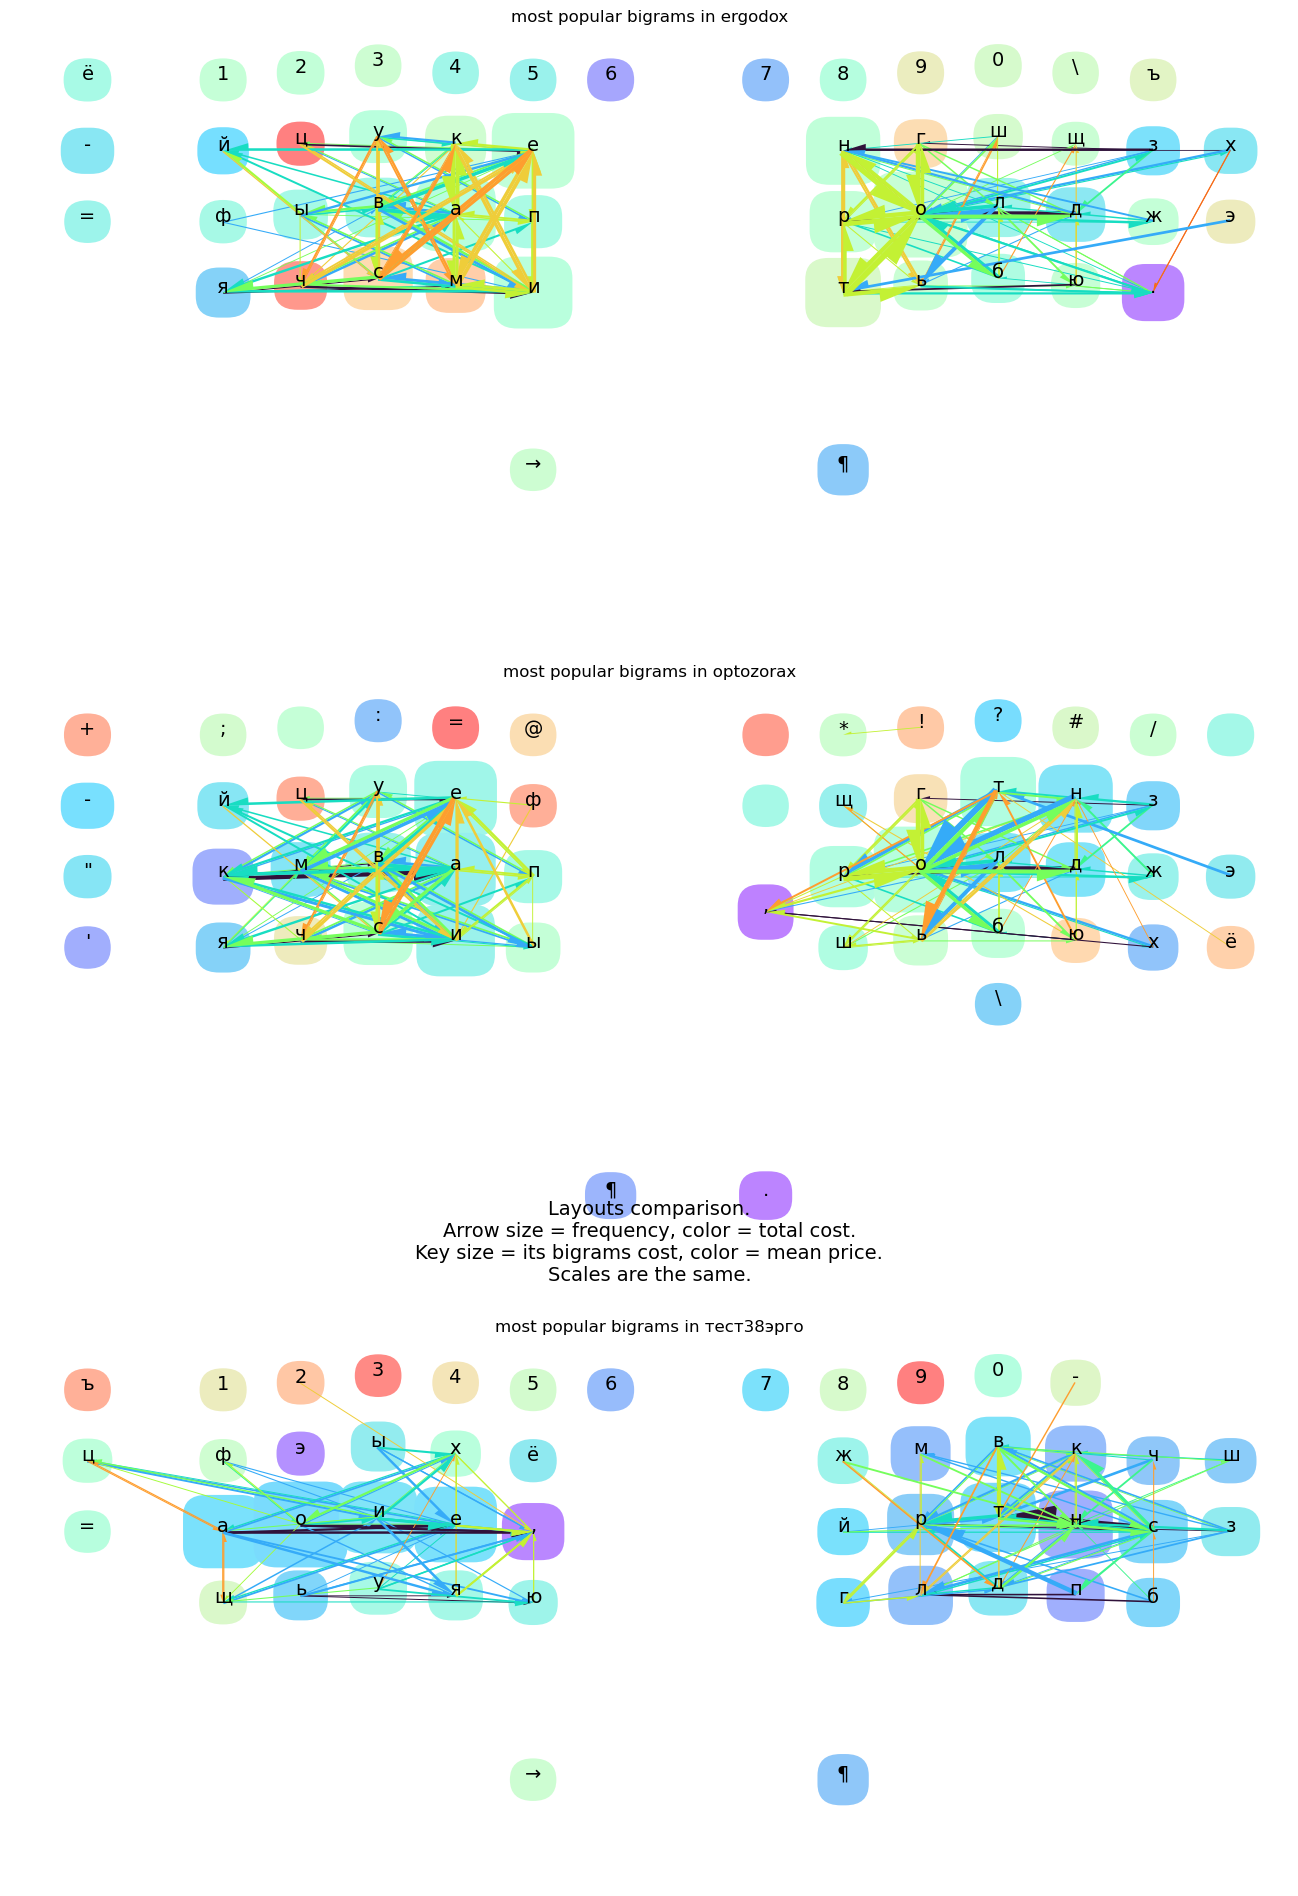

In [7]:
results['ergodox'].combomap(results['optozorax'], results['тест38эрго'])

As we can see in the map above, йцукен on Ergodox is harder in most keys. Let's see what letters were improved actually:

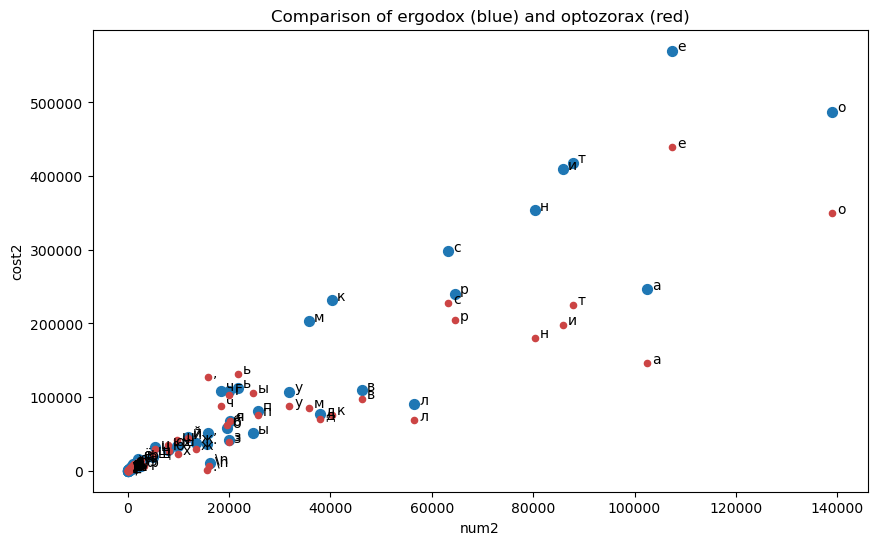

In [8]:
results['ergodox'].combochart(results['optozorax'])

But you may notice that Optozorax' layout is actually a modest modification of the standard ЙЦУКЕН. How far can we improve it? I've simply translated my test28, moving the rightmost letter Ж to the left side, and slash to up-right corner. The result scores 2.5 times better.

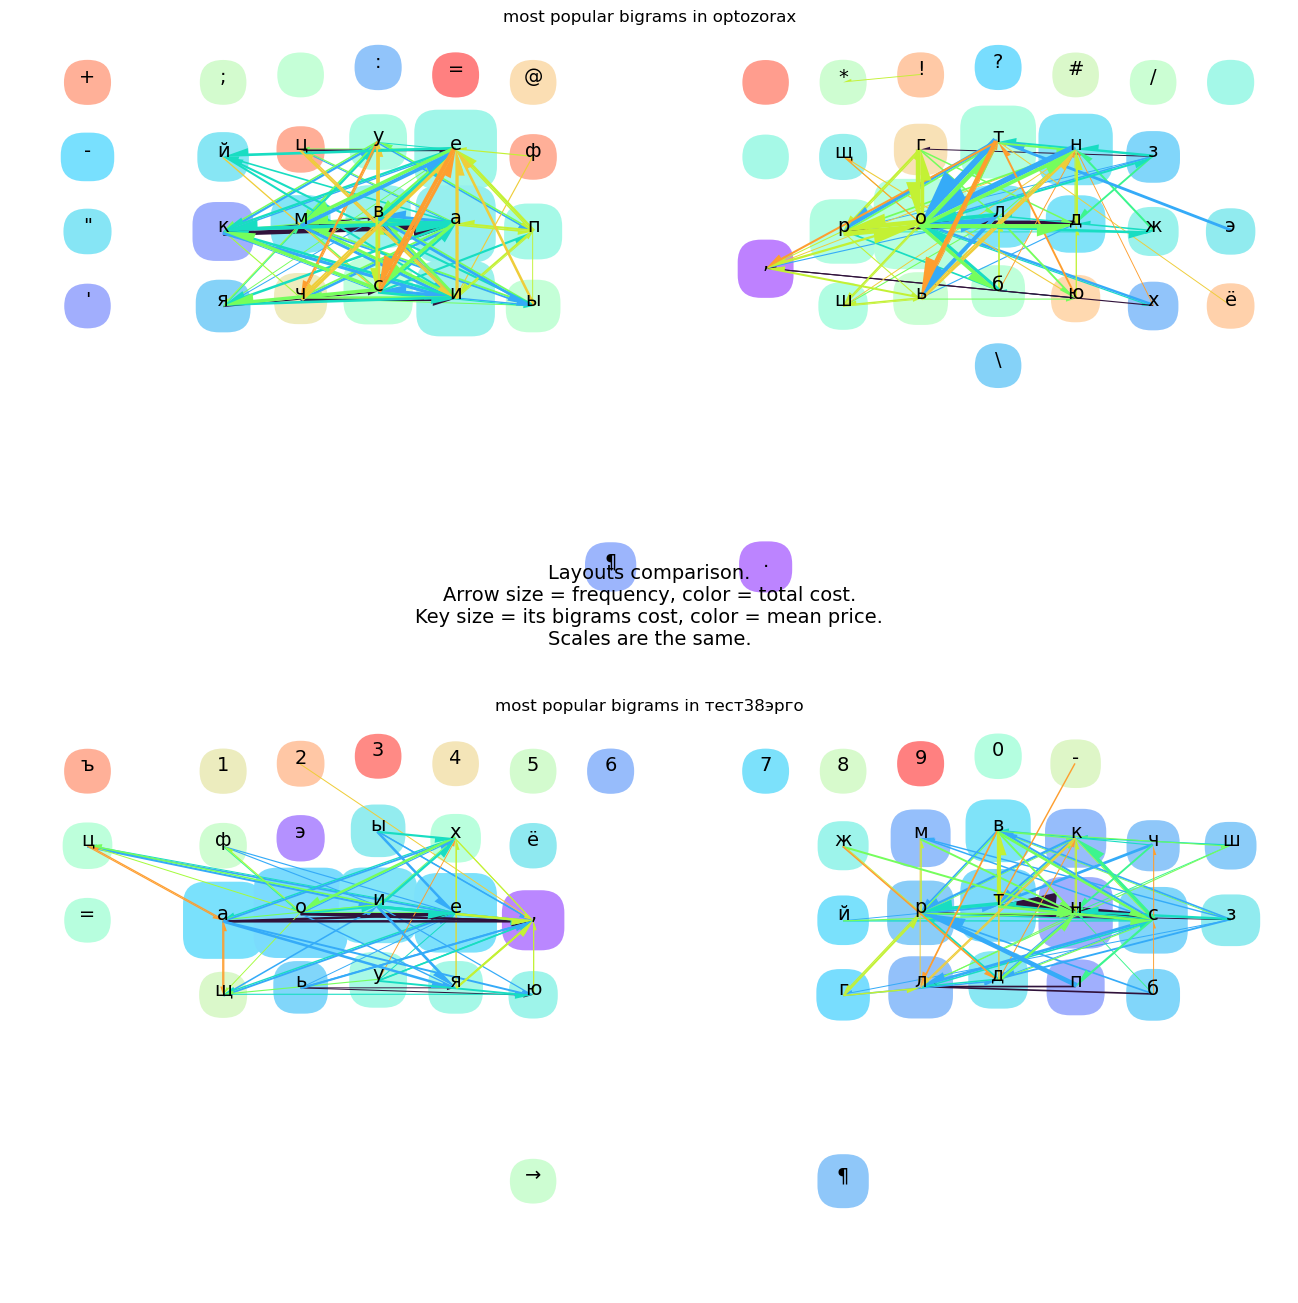

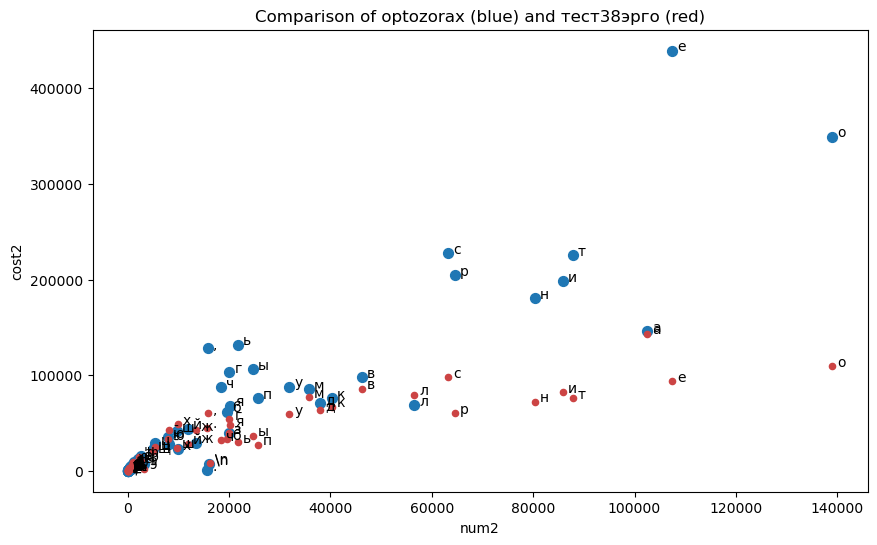

In [9]:
results['optozorax'].combomap(results['тест38эрго'])
results['optozorax'].combochart(results['тест38эрго'])